In [1]:

import warnings

import matplotlib.pyplot as plt
# import MultiTrade
import numpy as np
import pandas as pd
from IPython.display import display
from neuralforecast.core import NeuralForecast

from neuralforecast.auto import AutoBiTCN, AutoNBEATS, AutoTFT
from neuralforecast.losses.pytorch import RMSE

# from statsforecast import StatsForecast

from utils.utils import build_market_image,train_test_split_data,plot_insample_forecasts
from configs import defaults
import datetime
warnings.filterwarnings("ignore")

In [2]:
COIN_PAIRS=defaults.COIN_PAIRS
target_pair=defaults.target_pair
time_frame=defaults.time_frame
DATA_DIR=defaults.DATA_DIR

In [3]:

horizon = 7
context_length=5*horizon
split_n_days=30
round_time='H'
id_col='symbol'
save_path=defaults.forecasting_model_path

In [4]:

data=build_market_image(target_pair=target_pair,time_frame=time_frame,axis=0,data_dir=DATA_DIR,only_target=True)
# data.index

train_data,test_data=train_test_split_data(data=data,n_days=30)

# data['symbol'].unique()

# test_data
data

['data/binanceus-DOGEUSDT-1h.pkl']


0it [00:00, ?it/s]

100%|██████████| 78/78 [00:00<00:00, 10983.17it/s]
1it [00:00, 10.40it/s]

2024-10-22 11:00:00 2024-11-21 11:00:00


,open,high,low,close,volume,y,feature_hour_of_day,feature_day_of_week,feature_day_of_month,feature_day_of_year,feature_BBANDS_BB_UPPER,feature_BBANDS_BB_MIDDLE,feature_BBANDS_BB_LOWER,feature_MACD_MACD,feature_MACD_SIGNAL,feature_14_period_RSI,feature_14_period_STOCH_%K,ds,unique_id,symbol
date_close,,,,,,,,,,,,,,,,,,,,
2024-01-01 10:00:00,0.08975,0.08976,0.08975,0.08976,6209.0,0.08976,-0.065217,-0.5,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-01-01 10:00:00,25,DOGEUSDT
2024-01-01 11:00:00,0.08977,0.09012,0.08972,0.09012,13750.0,0.09012,-0.021739,-0.5,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000008,0.000004,100.000000,0.000000,2024-01-01 11:00:00,25,DOGEUSDT
2024-01-01 12:00:00,0.09008,0.09008,0.08992,0.08992,583.0,0.08992,0.021739,-0.5,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000004,0.000004,62.566845,0.000000,2024-01-01 12:00:00,25,DOGEUSDT
2024-01-01 13:00:00,0.08995,0.09046,0.08995,0.09040,12750.0,0.09040,0.065217,-0.5,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000020,0.000009,80.974284,0.000000,2024-01-01 13:00:00,25,DOGEUSDT
2024-01-01 14:00:00,0.09018,0.09053,0.09018,0.09053,5594.0,0.09053,0.108696,-0.5,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000033,0.000016,83.360761,0.000000,2024-01-01 14:00:00,25,DOGEUSDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-21 15:00:00,0.38733,0.39500,0.38540,0.38699,542145.0,0.38699,0.152174,0.0,0.166667,0.390411,0.390681,0.381419,0.372158,0.000587,-0.000244,54.648116,69.415808,2024-11-21 15:00:00,25,DOGEUSDT
2024-11-21 16:00:00,0.38617,0.38670,0.37738,0.38109,436413.0,0.38109,0.195652,0.0,0.166667,0.390411,0.390038,0.381868,0.373698,0.000311,-0.000133,47.387898,46.888125,2024-11-21 16:00:00,25,DOGEUSDT
2024-11-21 17:00:00,0.38099,0.38424,0.37948,0.38273,198993.0,0.38273,0.239130,0.0,0.166667,0.390411,0.390021,0.382143,0.374265,0.000223,-0.000062,49.400230,46.442601,2024-11-21 17:00:00,25,DOGEUSDT


In [5]:
model=NeuralForecast.load(save_path)

Seed set to 4
Seed set to 3


In [6]:
model.dataset, model.uids, model.last_dates, model.ds = model._prepare_fit(
                df=test_data,
                static_df=None,
                sort_df=model.sort_df,
                predict_only=True,
                id_col=model.id_col,
                time_col=model.time_col,
                target_col=model.target_col,
            )


In [7]:
test_pred_insample = model.predict_insample(step_size=horizon)


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

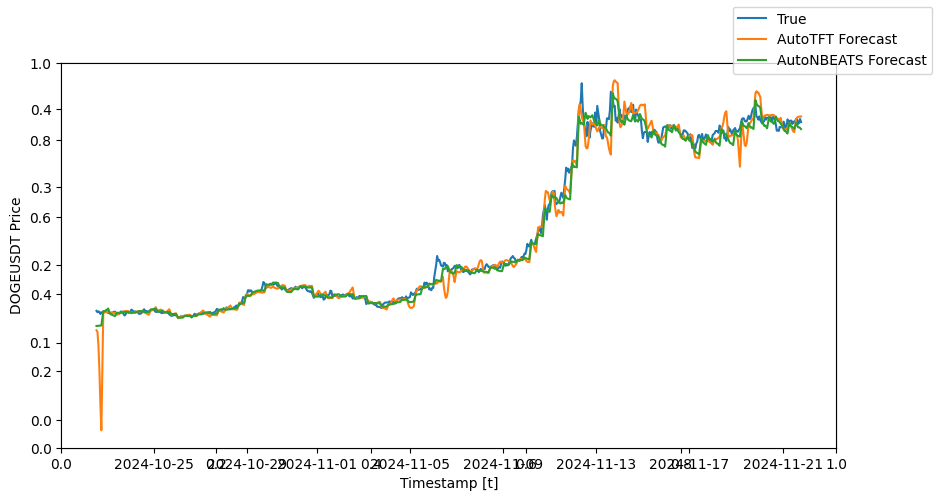

In [8]:
plot_insample_forecasts(test_pred_insample)


In [9]:
test_data['close']=test_data['y'].copy()


In [10]:
idx,cut_data=next(iter(test_pred_insample.groupby(['cutoff','symbol'])))
def flatten_preds(idx,cut_data):
    t_off_pred,symb=idx
    pred_cols=cut_data.filter(like='Auto').columns
    cut_data['mean_pred']=cut_data[pred_cols].mean(axis=1)
    cut_data=cut_data.drop(pred_cols,axis=1)
    t_cut=cut_data.T

    t_cut=t_cut.drop('cutoff')
    t_cut=t_cut.drop('ds')
    t_cut=t_cut.drop('y')
    # print(t_cut)
    h_cols=[f'H{i}' for i in range(horizon-1)]
    # print (h_cols)
    t_cut.columns=h_cols


    flat_cols=[f'feature_{model}_{horizon}' for model in t_cut.index for horizon in t_cut.columns]
    pred_values=t_cut.values.flatten()

    flat_df=pd.DataFrame([pred_values],columns=flat_cols)
    id_cols=['ds','symbol']

    flat_df[id_cols]=t_off_pred,symb
    flat_df=  flat_df[id_cols+flat_cols]
    return flat_df

def simulate_forecasts(model,df):
    model.dataset, model.uids, model.last_dates, model.ds = model._prepare_fit(
                df=test_data,
                static_df=None,
                sort_df=model.sort_df,
                predict_only=True,
                id_col=model.id_col,
                time_col=model.time_col,
                target_col=model.target_col,
            )
    
    
    return model.predict_insample(step_size=1)

def prepare_forecast_data(model,test_data):
    
    pred_df= simulate_forecasts(model,test_data)
    flattened_preds=pd.concat([flatten_preds(idx,cut_data) for idx,cut_data in pred_df.groupby(['cutoff','symbol'])])
    return flattened_preds



prepare_forecast_data(model,test_data)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

,ds,symbol,feature_mean_pred_H0,feature_mean_pred_H1,feature_mean_pred_H2,feature_mean_pred_H3,feature_mean_pred_H4,feature_mean_pred_H5
0,2024-10-22 10:00:00,DOGEUSDT,0.118669,0.117599,0.108856,0.093002,0.071594,0.054683
0,2024-10-22 11:00:00,DOGEUSDT,0.139933,0.154765,0.181328,0.206832,0.225297,0.236604
0,2024-10-22 12:00:00,DOGEUSDT,0.140815,0.139992,0.140268,0.140707,0.141133,0.141924
0,2024-10-22 13:00:00,DOGEUSDT,0.138444,0.136211,0.135663,0.136135,0.137015,0.138360
0,2024-10-22 14:00:00,DOGEUSDT,0.138890,0.138202,0.138015,0.138795,0.139482,0.140204
...,...,...,...,...,...,...,...,...
0,2024-11-21 09:00:00,DOGEUSDT,0.383423,0.380003,0.375932,0.374574,0.373786,0.372411
0,2024-11-21 10:00:00,DOGEUSDT,0.380545,0.377920,0.374609,0.372798,0.372319,0.372570
0,2024-11-21 11:00:00,DOGEUSDT,0.383466,0.382491,0.382434,0.384858,0.388054,0.389178
0,2024-11-21 12:00:00,DOGEUSDT,0.385348,0.384717,0.384363,0.384742,0.383980,0.382864


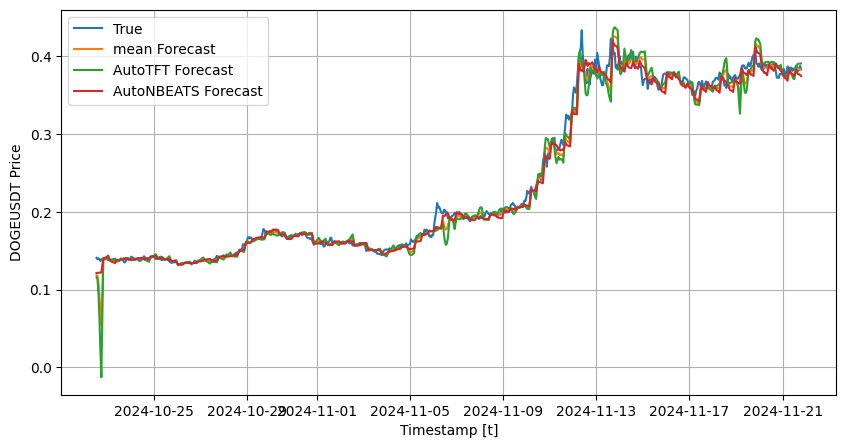

In [11]:
cut_data
for symb,cut in test_pred_insample.groupby('symbol'):
    cut['mean']=cut.filter(like='Auto').mean(axis=1)

    plt.figure(figsize=(10, 5))
    
    plt.plot(cut['ds'], cut['y'], label='True')
    plt.plot(cut['ds'], cut['mean'] ,label='mean Forecast')
    for model in cut.filter(like='Auto').columns:
        plt.plot(cut['ds'], cut[model], label=f'{model} Forecast')
    # plt.plot(cut['ds'], cut['NBEATS'], label='NBEATS Forecast')
    # plt.plot(cut['ds'], cut['BiTCN'], label='BiTCN Forecast')
    # plt.plot(cut['ds'], cut['TFT'], label='TFT Forecast')
    # plt.axvline(cut['ds'].iloc[-12], color='black', linestyle='--', label='Train-Test Split')
    plt.xlabel('Timestamp [t]')
    plt.ylabel(f'{symb} Price')
    plt.grid()
    plt.legend()

In [12]:
# StatsForecast.plot(test_pred_insample, engine='matplotlib',time_col='ds',id_col=id_col, max_insample_length=horizon,)
# StatsForecast.plot(test_pred_insample, engine='matplotlib',time_col='ds',id_col=id_col,target_col='AutoNBEATS', max_insample_length=horizon,)
